# Iris Dataset

Below we explore the famous dataset of Iris data, we first need to import the data, which is in csv form, from the following address http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data. 

According to the website the following information is provided about the dataset

>This is an exceedingly simple domain and perhaps is the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

The attribute we aim to predict is
>Predicted attribute: class of iris plant. 

 

In [1]:
import pandas as pd
# we are using the inline backend
%matplotlib inline 
#mpl.style.use('ggplot') # optional: for ggplot-like style
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
#%matplotlib notebook
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_data = pd.read_csv(url, header=None)
iris_data.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


As you can see we have suscessfully read the data, but because the data lacks column name pandas automatically have indexed them with numbers, so lets now add name of each columns. Therefore, in such cases, we have to tell pandas that the firts row is not header, if not pandas will assume it is a hearder.

Luckily we are provided information about the attributes:

>1. sepal length in cm 
>2. sepal width in cm 
>3. petal length in cm 
>4. petal width in cm 
>5. class:   
>-- Iris Setosa   
>-- Iris Versicolour   
>-- Iris Virginica  

Thus we use this information and make headers which we use it as name of the columns as:

In [2]:
headers =["sepal_length_in_cm", "sepal_width_in_cm", "petal_length_in_cm", "petal_width_in_cm", "flower_class"]
iris_data.columns = headers
iris_data.head(10)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,flower_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Next we check if the size of the downloaded dataset, i.e howmany rows and columns we have. The output is given as *(i,j)* where *i* is the number of rows and *j* is the number of columns.

In [3]:
iris_data.shape

(150, 5)

We can then ask howmany we have in each categroy using the following

In [4]:
print(iris_data.groupby('flower_class').size())


flower_class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Now what is left is to check if we have missing values, in case the missing value markers is made to be "NA", therefore we inform pandas about this marker, we can do so via
```
iris_data = pd.read_csv(url, na_values=['NA'])
```
According to the website, where we downloaded the dataset, 
>This data differs from the data presented in Fishers article
	(identified by Steve Chadwick,  spchadwick@espeedaz.net )
	The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
	where the error is in the fourth feature.
	The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
	where the errors are in the second and third features. 

If we want to check such error in a specified rows we do as 


In [5]:
iris_data.loc[34:40,:]

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,flower_class
34,4.9,3.1,1.5,0.1,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa


Next it is always advisiable to have a rough summary about the data at hand and to do so we use the describe method

In [6]:
iris_data.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We further obtain additional information about the data types, and if there is or isn't null parametrs, using the info method 

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_in_cm    150 non-null float64
sepal_width_in_cm     150 non-null float64
petal_length_in_cm    150 non-null float64
petal_width_in_cm     150 non-null float64
flower_class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


All seem in order, the next thing one can ask is see how correlated the dataset is (we do so later using graphs too)

In [8]:
iris_data.corr()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
sepal_length_in_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_in_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_in_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_in_cm,0.817954,-0.356544,0.962757,1.000000


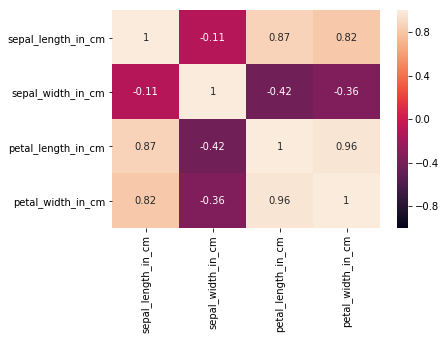

In [9]:
#or to see it in a heat map
#correlation matrix
Iris_corr=iris_data.corr()
#show it as a heat map
sns.heatmap(Iris_corr,vmin=-1,annot=True)

From the correlation heat map we deduce that there is strong correlation between petal_length_in_cm and petal_width_in_cm, petal_length_in_cm and sepal_length_in_cm, petal_width_in_cm and sepal_length_in_cm.

For what we will do next we need to import the matplotlib for producing interesting figures and plots. To this end let's start by importing `Matplotlib`, `seaborn`, and `Matplotlib.pyplot` as follows: 

Let's now make boxplot, it summarizes and comapres each of the dataset arguments 

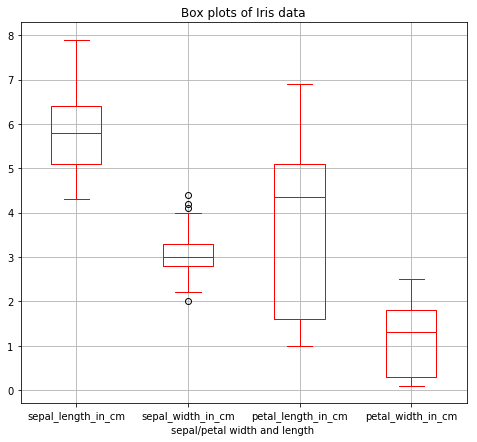

In [10]:
iris_data.plot(kind='box', figsize=(8, 7), grid=True, color ='red')

plt.title('Box plots of Iris data')
plt.xlabel('sepal/petal width and length ')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126439198>,
      dtype=object)

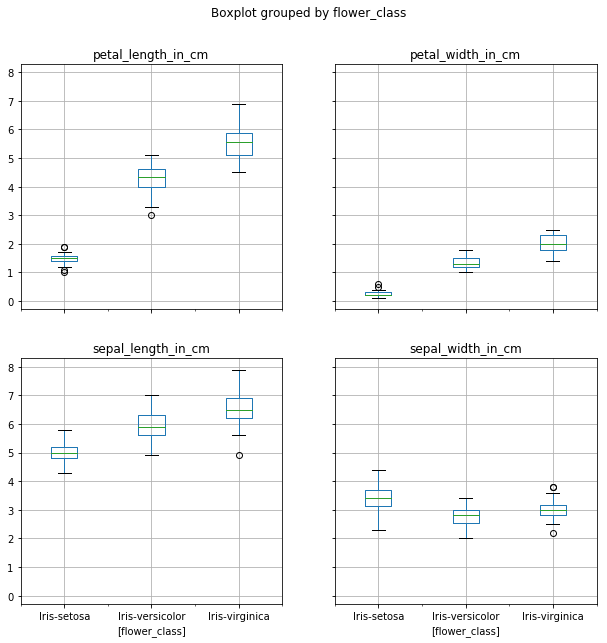

In [11]:
iris_data.boxplot(by="flower_class",figsize=(10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126a66f98>,
      dtype=object)

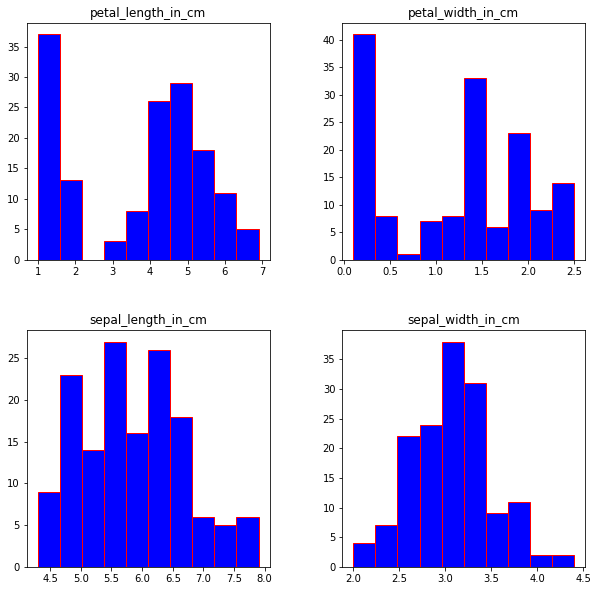

In [12]:
iris_data.hist(edgecolor='red', linewidth=1.0, grid=False, figsize=(10,10), color='blue')

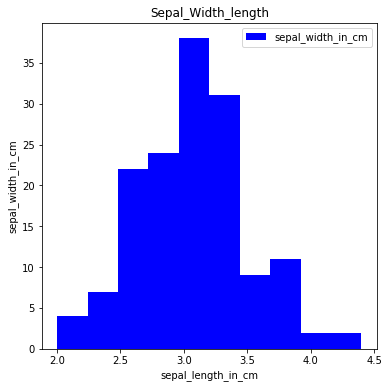

In [13]:
iris_data_sepal = iris_data[["sepal_length_in_cm", "sepal_width_in_cm"]]
iris_data_sepal.plot(kind='hist', x='sepal_length_in_cm', y='sepal_width_in_cm', figsize=(6, 6), color='blue')

plt.title('Sepal_Width_length')
plt.xlabel('sepal_length_in_cm')
plt.ylabel('sepal_width_in_cm')

plt.show()

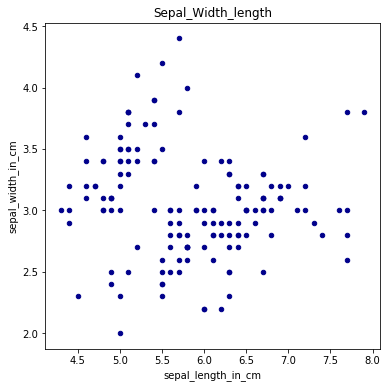

In [14]:
iris_data_sepal = iris_data[["sepal_length_in_cm", "sepal_width_in_cm"]]
iris_data_sepal.plot(kind='scatter', x='sepal_length_in_cm', y='sepal_width_in_cm', figsize=(6, 6), color='darkblue')

plt.title('Sepal_Width_length')
plt.xlabel('sepal_length_in_cm')
plt.ylabel('sepal_width_in_cm')

plt.show()

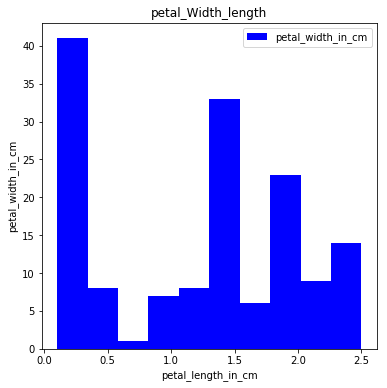

In [15]:
iris_data_petal = iris_data[["petal_length_in_cm", "petal_width_in_cm"]]
iris_data_petal.plot(kind='hist', x='petal_length_in_cm', y='petal_width_in_cm', figsize=(6, 6), color='blue')

plt.title('petal_Width_length')
plt.xlabel('petal_length_in_cm')
plt.ylabel('petal_width_in_cm')

plt.show()

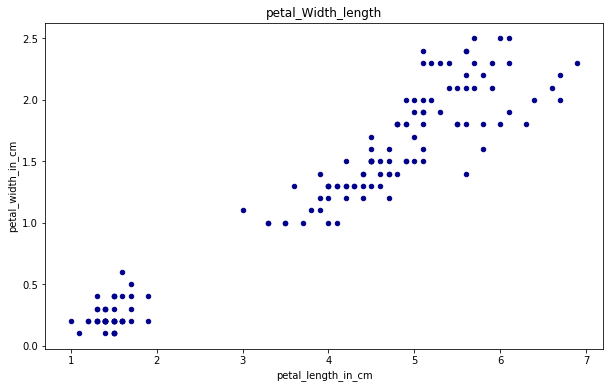

In [16]:
iris_data_petal = iris_data[["petal_length_in_cm", "petal_width_in_cm"]]
iris_data_petal.plot(kind='scatter', x='petal_length_in_cm', y='petal_width_in_cm', figsize=(10, 6), color='darkblue')

plt.title('petal_Width_length')
plt.xlabel('petal_length_in_cm')
plt.ylabel('petal_width_in_cm')

plt.show()

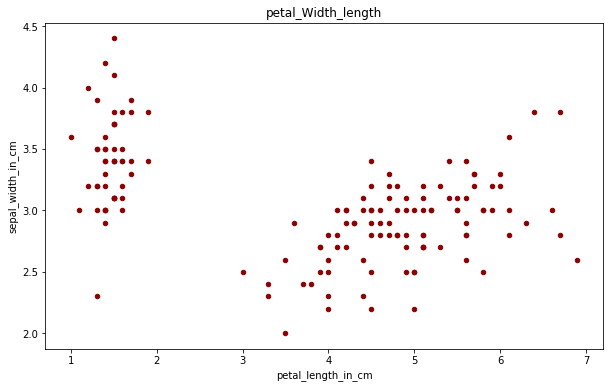

In [17]:
iris_data_petalS = iris_data[["petal_length_in_cm", "sepal_width_in_cm"]]
iris_data_petalS.plot(kind='scatter', x='petal_length_in_cm', y='sepal_width_in_cm', figsize=(10, 6), color='darkred')

plt.title('petal_Width_length')
plt.xlabel('petal_length_in_cm')
plt.ylabel('sepal_width_in_cm')

plt.show()

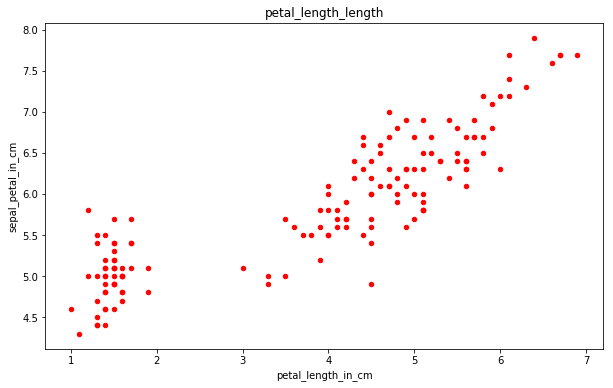

In [18]:
iris_data_petalSp = iris_data[["petal_length_in_cm", "sepal_length_in_cm"]]
iris_data_petalSp.plot(kind='scatter', x='petal_length_in_cm', y='sepal_length_in_cm', figsize=(10, 6), color='red')

plt.title('petal_length_length')
plt.xlabel('petal_length_in_cm')
plt.ylabel('sepal_petal_in_cm')

plt.show()

Let's now make scatter matrix plot 

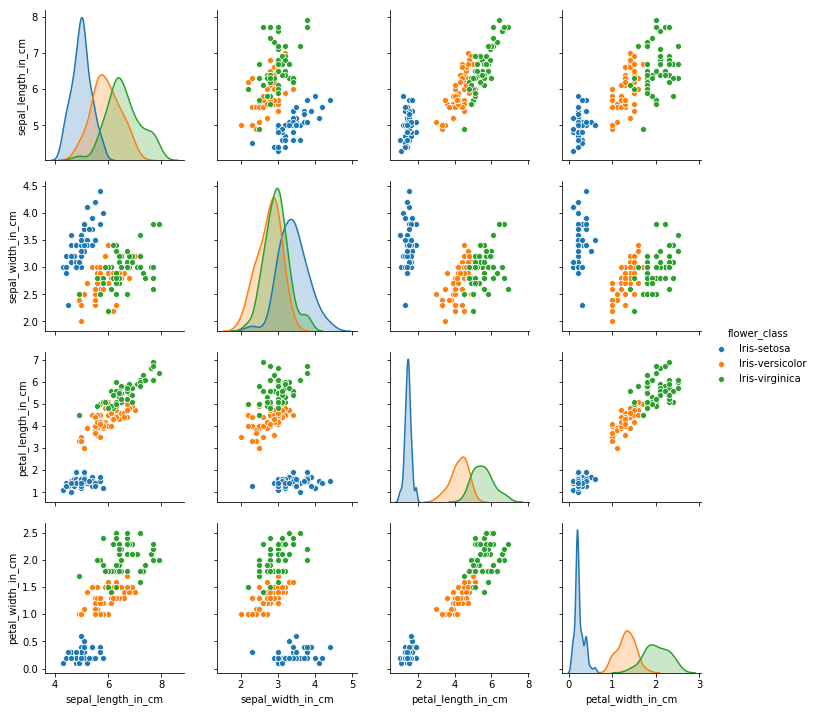

In [19]:
# We drop the rows with 'NA' values as sns ploting doesn't encorporate them
sns.pairplot(iris_data.dropna(), hue='flower_class');

From the scatterplot matrix, we can see the correlations between each entries

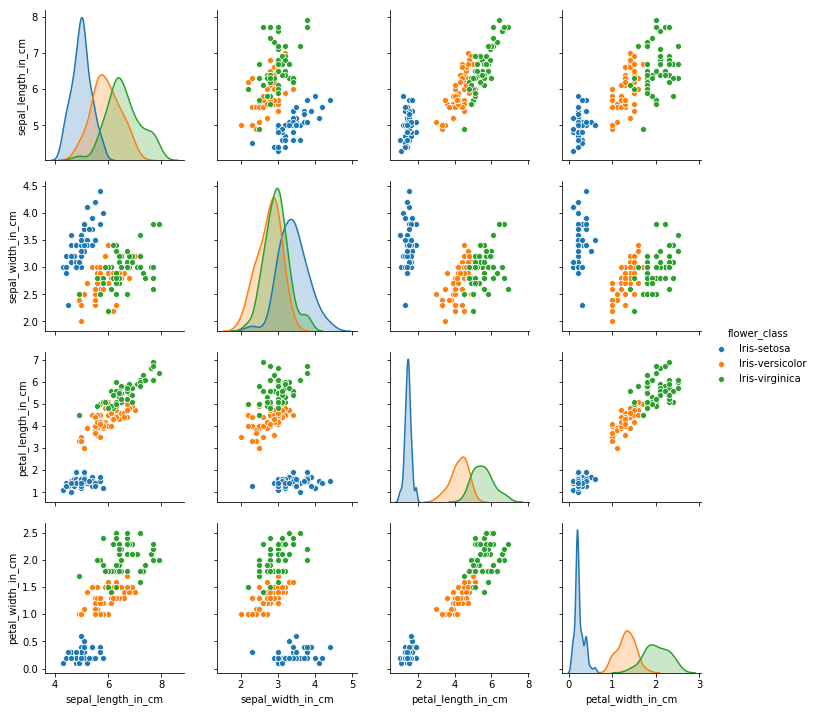

In [20]:
# The diagonal elements in a pairplot to show a kde
sns.pairplot(iris_data, hue='flower_class',diag_kind='kde')

We can enforce different markers, and shade the digonal plot 

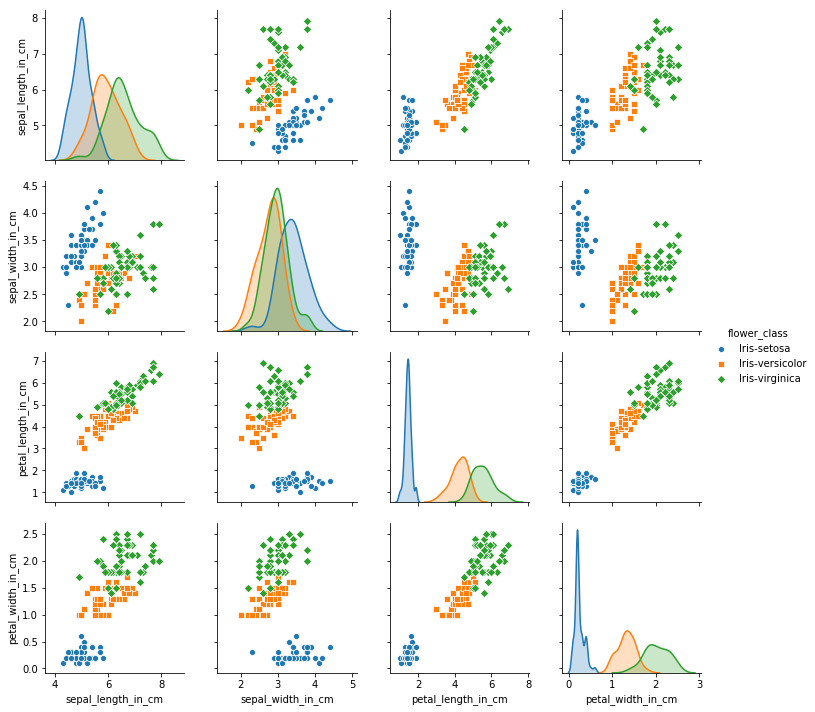

In [21]:
 sns.pairplot(iris_data, hue="flower_class", markers=["o", "s", "D"],diag_kind="kde",diag_kws=dict(shade=True))


The following line of code fits linear regression models to the scatter plot

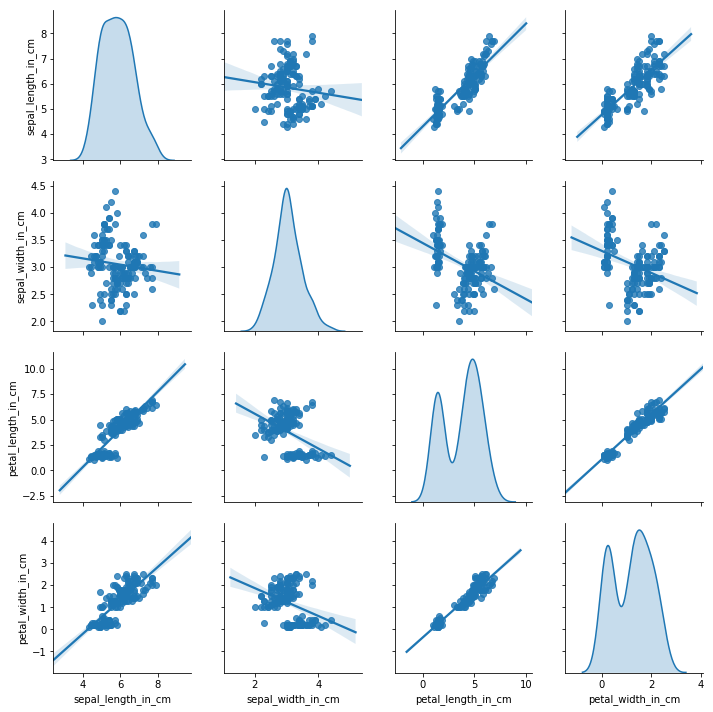

In [22]:
sns.pairplot(iris_data, kind="reg",diag_kind="kde",diag_kws=dict(shade=True))

# Predicting Model

In [23]:
#KNN example
#split our dataset into its attributes and labels
#The X variable contains the first four columns of the dataset (i.e. attributes) 
#while y contains the labels.
X = iris_data[['sepal_length_in_cm', 'sepal_width_in_cm',
                             'petal_length_in_cm', 'petal_width_in_cm']].values  
y = iris_data['flower_class'].values  
#train test split 
#splits the dataset into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5) 
#feature scaling
 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

#training the prediction
 
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
#make prediction on our test data
y_pred = classifier.predict(X_test)  

#Evaluating the algorithm
 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[16  0  0]
 [ 0 16  1]
 [ 0  1 16]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.94      0.94      0.94        17

      micro avg       0.96      0.96      0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



This notebook was created by [Dawit H. Hailu (PhD)](https://www.linkedin.com/in/dawit-h-hailu-ph-d-4b7b8787/)